In [105]:
%env HV_DOC_HTML=true

env: HV_DOC_HTML=true


In [106]:
!pip install jupyter_bokeh

In [107]:
pip install -q hvplot

In [5]:
pip install -q holoviews

In [108]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import holoviews as hv
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [109]:
TeamBasicStatsDF = pd.read_csv("03172025TeamBasicStats.csv")

TeamBasicStatsDF.head()


,Rk,School,G,W,L,W-L%,SRS,SOS,Unnamed: 8,W.1,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,1,Abilene Christian,32,16,16,0.500,-5.47,-2.02,NaN,8,...,476,666,0.715,355,1081,421,331,94,476,670
1,2,Air Force,32,4,28,0.125,-7.75,3.96,NaN,1,...,363,572,0.635,236,956,428,181,91,433,571
2,3,Akron,34,28,6,0.824,3.54,-4.52,NaN,17,...,429,570,0.753,410,1325,615,262,127,407,609
3,4,Alabama,33,25,8,0.758,25.96,16.26,NaN,13,...,611,853,0.716,426,1422,555,200,147,422,628
4,5,Alabama A&M,32,10,22,0.313,-20.36,-9.77,NaN,6,...,490,738,0.664,447,1172,432,266,131,513,687


In [110]:
sweet16 = ["Auburn", "Michigan", "Mississippi", "Michigan State", "Florida", "Maryland", "Texas Tech", "Arkansas", "Duke", "Arizona", "Brigham Young", "Alabama", "Houston", "Purdue", "Kentucky", "Tennessee"]
print(sweet16)

['Auburn', 'Michigan', 'Mississippi', 'Michigan State', 'Florida', 'Maryland', 'Texas Tech', 'Arkansas', 'Duke', 'Arizona', 'Brigham Young', 'Alabama', 'Houston', 'Purdue', 'Kentucky', 'Tennessee']


In [111]:
"Add a column to the DF containing a 1 for teams that made the sweet 16 and 0 for teams that did not"

TeamBasicStatsDF["Made_Sweet16"] = np.where(TeamBasicStatsDF["School"].isin(sweet16), 1, 0)
TeamBasicStatsDF.set_index('School', inplace=True)

print(TeamBasicStatsDF.columns)
TeamBasicStatsDF.head()

Index(['Rk', 'G', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'Unnamed: 8', 'W.1', 'L.1',
       'Unnamed: 11', 'W.2', 'L.2', 'Unnamed: 14', 'W.3', 'L.3', 'Unnamed: 17',
       'Tm.', 'Opp.', 'Unnamed: 20', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'Made_Sweet16'],
      dtype='object')


,Rk,G,W,L,W-L%,SRS,SOS,Unnamed: 8,W.1,L.1,...,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF,Made_Sweet16
School,,,,,,,,,,,,,,,,,,,,,
Abilene Christian,1,32,16,16,0.500,-5.47,-2.02,NaN,8,8,...,666,0.715,355,1081,421,331,94,476,670,0
Air Force,2,32,4,28,0.125,-7.75,3.96,NaN,1,19,...,572,0.635,236,956,428,181,91,433,571,0
Akron,3,34,28,6,0.824,3.54,-4.52,NaN,17,1,...,570,0.753,410,1325,615,262,127,407,609,0
Alabama,4,33,25,8,0.758,25.96,16.26,NaN,13,5,...,853,0.716,426,1422,555,200,147,422,628,1
Alabama A&M,5,32,10,22,0.313,-20.36,-9.77,NaN,6,12,...,738,0.664,447,1172,432,266,131,513,687,0


In [172]:
# create scatter plot where you can toggle between measures to detect correlation


hvplot.extension("bokeh")
import panel as pn
pn.extension()


SRS = TeamBasicStatsDF.hvplot.scatter(x="SRS",y="Made_Sweet16", color = 'green', alpha=.50, label = 'SRS vs Made Sweet 16')
SOS = TeamBasicStatsDF.hvplot.scatter(x="SOS",y="Made_Sweet16", color = 'pink', alpha=.50, label = 'SOS vs Made Sweet 16')
FTA = TeamBasicStatsDF.hvplot.scatter(x="FTA",y="Made_Sweet16", color = 'orange', alpha=.50, label = 'FTA vs Made Sweet 16')
ORB = TeamBasicStatsDF.hvplot.scatter(x="ORB",y="Made_Sweet16", color = 'blue', alpha=.50, label = 'ORB vs Made Sweet 16')
TRB = TeamBasicStatsDF.hvplot.scatter(x="TRB",y="Made_Sweet16", color = 'red', alpha=.50, label = 'TRB vs Made Sweet 16')
AST = TeamBasicStatsDF.hvplot.scatter(x="AST",y="Made_Sweet16", color = 'purple', alpha=.50, label = 'AST vs Made Sweet 16')
STL = TeamBasicStatsDF.hvplot.scatter(x="STL",y="Made_Sweet16", color = 'yellow', alpha=.50, label = 'STL vs Made Sweet 16')
BLK = TeamBasicStatsDF.hvplot.scatter(x="BLK",y="Made_Sweet16", color = 'brown', alpha=.50, label = 'BLK vs Made Sweet 16')
TOV = TeamBasicStatsDF.hvplot.scatter(x="TOV",y="Made_Sweet16", color = 'gray', alpha=.50, label = 'TOV vs Made Sweet 16')
PF = TeamBasicStatsDF.hvplot.scatter(x="PF",y="Made_Sweet16", color = 'black', alpha=.50, label = 'PF vs Made Sweet 16')

# Combine and allow toggling
(SRS * SOS * FTA * ORB * TRB * AST * STL * BLK * TOV * PF).opts(
    legend_position='right',
    show_legend=True,
    tools=['hover']
)




def plot_layer(layer):
    if layer == 'SRS':
        return TeamBasicStatsDF.hvplot.scatter(x="SRS",y="Made_Sweet16", color = 'blue', alpha=.50, label = 'SRS vs Made Sweet 16')
    elif layer == 'SOS':
        return TeamBasicStatsDF.hvplot.scatter(x="SOS",y="Made_Sweet16", color = 'pink', alpha=.50, label = 'SOS vs Made Sweet 16')
    elif layer == 'FTA':
        return TeamBasicStatsDF.hvplot.scatter(x="FTA",y="Made_Sweet16", color = 'orange', alpha=.50, label = 'FTA vs Made Sweet 16')
    elif layer == 'ORB':
        return TeamBasicStatsDF.hvplot.scatter(x="ORB",y="Made_Sweet16", color = 'blue', alpha=.50, label = 'ORB vs Made Sweet 16')
    elif layer == 'TRB':
        return TeamBasicStatsDF.hvplot.scatter(x="TRB",y="Made_Sweet16", color = 'red', alpha=.50, label = 'TRB vs Made Sweet 16')
    elif layer == 'AST':
        return TeamBasicStatsDF.hvplot.scatter(x="AST",y="Made_Sweet16", color = 'purple', alpha=.50, label = 'AST vs Made Sweet 16')
    elif layer == 'STL':
        return TeamBasicStatsDF.hvplot.scatter(x="STL",y="Made_Sweet16", color = 'yellow', alpha=.50, label = 'STL vs Made Sweet 16')
    elif layer == 'BLK':
        return TeamBasicStatsDF.hvplot.scatter(x="BLK",y="Made_Sweet16", color = 'brown', alpha=.50, label = 'BLK vs Made Sweet 16')
    elif layer == 'TOV':
      return TeamBasicStatsDF.hvplot.scatter(x="TOV",y="Made_Sweet16", color = 'gray', alpha=.50, label = 'TOV vs Made Sweet 16')
    elif layer == 'PF':
      return TeamBasicStatsDF.hvplot.scatter(x="PF",y="Made_Sweet16", color = 'black', alpha=.50, label = 'PF vs Made Sweet 16')




layer_selector = pn.widgets.Select(options=['SRS', 'SOS', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF'], name='Layer')
interactive_plot = pn.bind(plot_layer, layer=layer_selector)

pn.Column(layer_selector, interactive_plot)

Column
    [0] Select(name='Layer', options=['SRS', 'SOS', ...], value='SRS')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

In [114]:
hvplot.extension("bokeh")
import panel as pn
pn.extension()


WL = TeamBasicStatsDF.hvplot.scatter(x="W-L%",y="Made_Sweet16", color = 'green', alpha=.50, label = 'WL vs Made Sweet 16')
TP = TeamBasicStatsDF.hvplot.scatter(x="3P%",y="Made_Sweet16", color = 'pink', alpha=.50, label = '3P% vs Made Sweet 16')
FT = TeamBasicStatsDF.hvplot.scatter(x="FT%",y="Made_Sweet16", color = 'orange', alpha=.50, label = 'FT% vs Made Sweet 16')


# Combine and allow toggling
(WL * TP * FT).opts(
    legend_position='right',
    show_legend=True,
    tools=['hover']
)




def plot_layer(layer):
    if layer == 'WL':
        return TeamBasicStatsDF.hvplot.scatter(x="W-L%",y="Made_Sweet16", color = 'green', alpha=.50, label = 'WL% vs Made Sweet 16')
    elif layer == 'TP':
        return TeamBasicStatsDF.hvplot.scatter(x="3P%",y="Made_Sweet16", color = 'pink', alpha=.50, label = 'TP% vs Made Sweet 16')
    elif layer == 'FT':
        return TeamBasicStatsDF.hvplot.scatter(x="FT%",y="Made_Sweet16", color = 'orange', alpha=.50, label = 'FT% vs Made Sweet 16')





layer_selector = pn.widgets.Select(options=['WL', 'TP', 'FT'], name='Layer')
interactive_plot = pn.bind(plot_layer, layer=layer_selector)

pn.Column(layer_selector, interactive_plot)

Column
    [0] Select(name='Layer', options=['WL', 'TP', 'FT'], value='WL')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

Reviewing the team statistics data with the interactive scatterplots inidicate that Win/Losss%, SRS and SOS seem to have the strongest correlation withe making the sweet 16.

In [146]:
# Define X and y
X =TeamBasicStatsDF[["W-L%", "SOS", "SRS"]]
y=TeamBasicStatsDF["Made_Sweet16"]




In [147]:
#Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [148]:
scaler = StandardScaler()

# Fit and transform on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaledDF = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_train_scaledDF.head()
train_combined = X_train_scaledDF.copy()
train_combined['Made_Sweet16'] = y_train
train_combined.head()

,W-L%,SOS,SRS,Made_Sweet16
School,,,,
Stephen F. Austin,-0.387022,-0.458218,-0.653297,0
Bethune-Cookman,-0.023311,-0.929297,-0.817762,0
Nevada-Las Vegas,0.149885,0.974967,0.680888,0
East Tennessee State,0.432771,-0.708335,-0.019186,0
Coastal Carolina,-1.189497,-0.828023,-0.996298,0


In [149]:
# Only transform (no fitting) on the test data
X_test_scaled = scaler.transform(X_test)
X_test_scaledDF=pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_test_scaledDF.head()

,W-L%,SOS,SRS
School,,,
Valparaiso,-0.450527,0.055826,-0.188927
Omaha,0.738751,-0.370754,-0.032378
West Georgia,-1.876507,-0.547217,-1.263663
Maryland-Baltimore County,-0.652589,-1.144122,-0.925939
Colorado,-0.617950,1.920194,0.987830


In [150]:
# make the logistic regression model
model = LogisticRegression(solver='lbfgs', random_state=1)
model



LogisticRegression(random_state=1)

In [151]:
# Fit the model
model.fit(X_train_scaledDF, y_train)


LogisticRegression(random_state=1)

In [152]:
print(X_train.columns)
print(X_test.columns)

Index(['W-L%', 'SOS', 'SRS'], dtype='object')
Index(['W-L%', 'SOS', 'SRS'], dtype='object')


In [173]:
# Predict using the model on the test data
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_scaledDF)

print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")


 Logistic regression model accuracy: 1.000


In [155]:
# evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[70  0]
 [ 0  3]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00         3

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



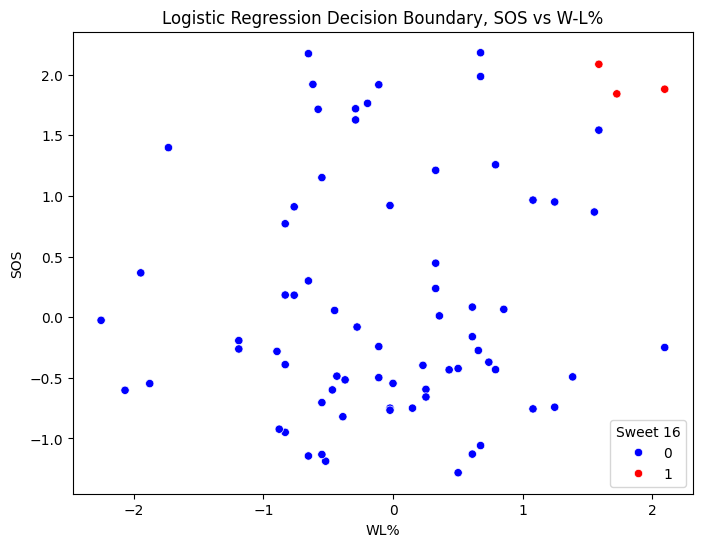

In [180]:
import seaborn as sns
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_scaled[:, 0], y=X_test_scaled[:, 1], hue=y_test, palette={
                0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("WL%")
plt.ylabel("SOS")
plt.title("Logistic Regression Decision Boundary, SOS vs W-L%")
plt.legend(title="Sweet 16", loc="lower right")
plt.show()

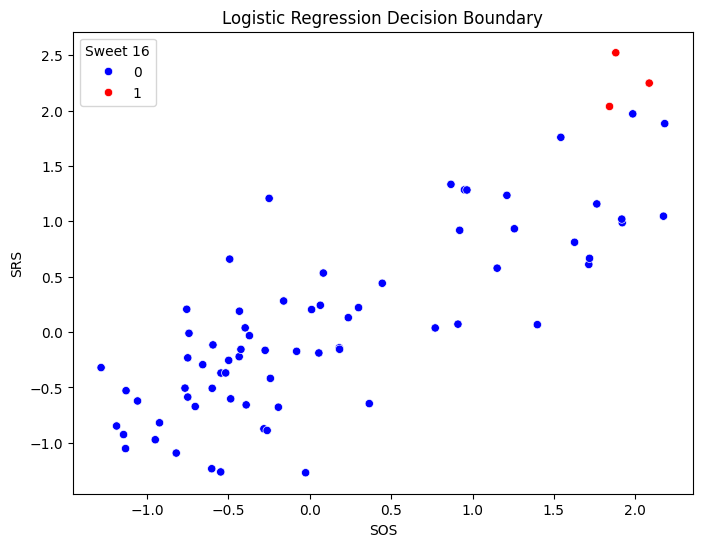

In [160]:
import seaborn as sns
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_scaled[:, 1], y=X_test_scaled[:, 2], hue=y_test, palette={
                0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("SOS")
plt.ylabel("SRS")
plt.title("Logistic Regression Decision Boundary")
plt.legend(title="Sweet 16", loc="upper left")
plt.show()

In [162]:
teamStatsFiltered = TeamBasicStatsDF[["W-L%", "SOS", "SRS",  "Made_Sweet16"]]
teamStatsFiltered16 = pd.DataFrame(teamStatsFiltered[teamStatsFiltered["Made_Sweet16"] == 1])
teamStatsFiltered16 = teamStatsFiltered16.drop(columns=["Made_Sweet16"])
teamStatsFiltered16


,W-L%,SOS,SRS
School,,,
Alabama,0.758,16.26,25.96
Arizona,0.647,13.82,23.12
Arkansas,0.606,11.18,16.64
Auburn,0.848,15.33,29.57
Brigham Young,0.727,9.71,19.80
Duke,0.912,9.51,30.31
Florida,0.882,11.81,27.98
Houston,0.882,12.70,28.44
Kentucky,0.667,14.18,21.61


In [169]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define your pipeline steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # First step: scaling
    ('model', LogisticRegression())  # Second step: logistic regression model
])

# Train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [170]:
import joblib
X_new = teamStatsFiltered16

# Save the trained pipeline to a file
joblib.dump(pipeline, 'model_pipeline.pkl')

# Load the pipeline back from the file
loaded_pipeline = joblib.load('model_pipeline.pkl')

# Now you can use the loaded pipeline to predict
pred = loaded_pipeline.predict(X_new)

In [171]:
# Predict for each row in the DataFrame using the pipeline
predictions = pipeline.predict(teamStatsFiltered16)

# Get the probabilities of class 1 (if needed)
probabilities = pipeline.predict_proba(teamStatsFiltered16)[:, 1]

# Add predictions and probabilities as new columns in the DataFrame
teamStatsFiltered16['Predicted Class'] = predictions
teamStatsFiltered16['Probability of Class 1'] = probabilities

# Show the updated DataFrame with predictions
print(teamStatsFiltered16[['Predicted Class', 'Probability of Class 1']])

                Predicted Class  Probability of Class 1
School                                                 
Alabama                       1                0.837848
Arizona                       1                0.518365
Arkansas                      0                0.141173
Auburn                        1                0.916433
Brigham Young                 0                0.246309
Duke                          1                0.793892
Florida                       1                0.804738
Houston                       1                0.847104
Kentucky                      1                0.503595
Maryland                      0                0.355298
Michigan                      0                0.457850
Michigan State                1                0.545609
Mississippi                   0                0.268771
Purdue                        0                0.448625
Tennessee                     1                0.701267
Texas Tech                    0                0